In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.TotalCharges.replace(" ", np.nan, inplace=True)

In [6]:
data['SeniorCitizen'] = pd.to_numeric(data['SeniorCitizen'])
data['tenure'] = pd.to_numeric(data['tenure'])
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
categorical_columns = data.select_dtypes(include= ['object', 'category'])

for feature in categorical_columns:
    print("="*100)
    print(f"Column: {feature} ->> {data[feature].unique()}")
    print("*"*100)
    print(f"Unique No. of Features: {data[feature].nunique()}")
    print("*"*100)
    print(f"Value Count of Features: \n {data[feature].value_counts()}")
    print("="*100)

Column: customerID ->> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
****************************************************************************************************
Unique No. of Features: 7043
****************************************************************************************************
Value Count of Features: 
 customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Column: gender ->> ['Female' 'Male']
****************************************************************************************************
Unique No. of Features: 2
****************************************************************************************************
Value Count of Features: 
 gender
Male      3555
Female    3488
Name: count, dtype: int64
Column: Partner ->> ['Yes' 'No']
*******************

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
len(categorical_columns.columns)

17

<Axes: >

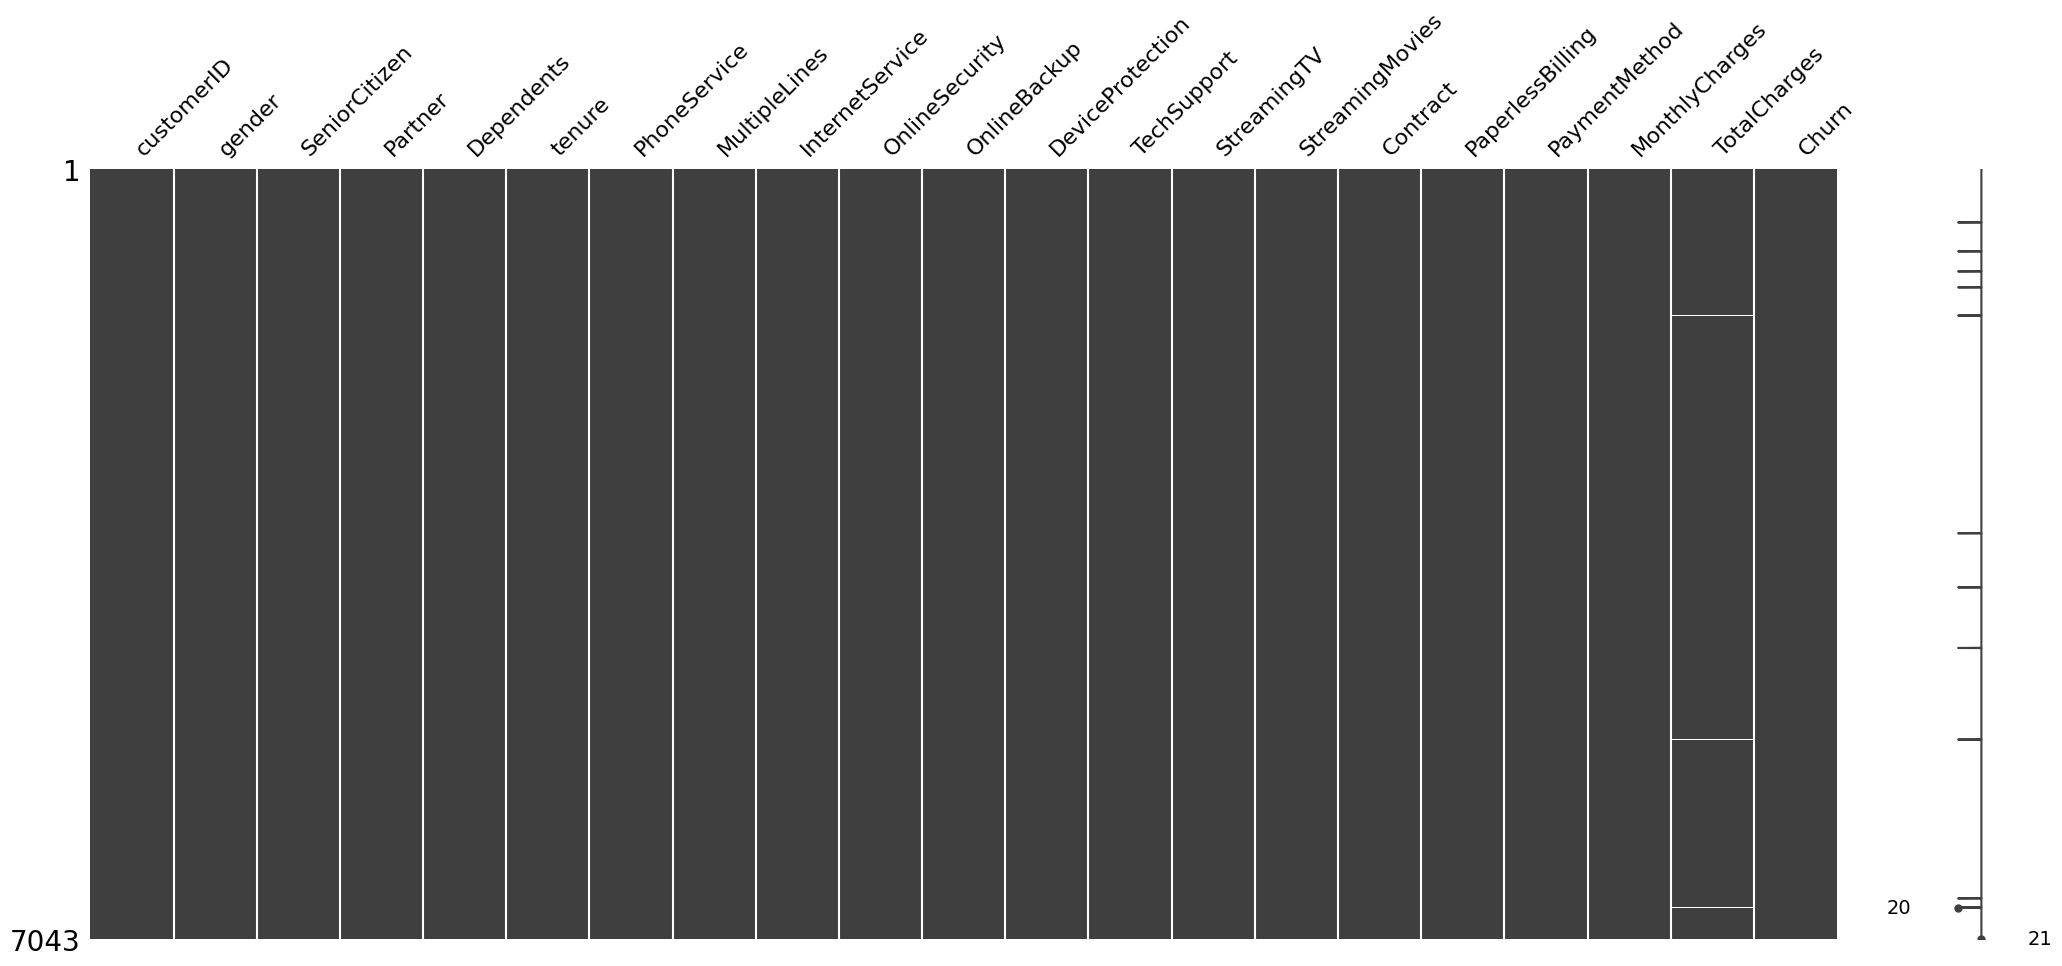

In [12]:
import missingno as msno

msno.matrix(data)

In [13]:
data['TotalCharges'].fillna(data['tenure'] * data['MonthlyCharges'], inplace = True)

In [14]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
def segregate_cat_num_cols (data):
    
    numerical_cols = data.select_dtypes(include = ['number']).columns
    categorical_cols = data.select_dtypes(include = ['object', 'category']).columns
    
    return numerical_cols, categorical_cols

num_cols, cat_cols = segregate_cat_num_cols(data)

print("Numerical Cols: \n",num_cols, "\n")
print("Categorical Cols: \n",cat_cols)

Numerical Cols: 
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object') 

Categorical Cols: 
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [16]:
for feature in data[cat_cols]:
    
    print(f"{feature}: {data[feature].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [17]:
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for feature in cols_to_replace:
    
    data[feature] = data[feature].replace('No internet service', 'No')

In [18]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

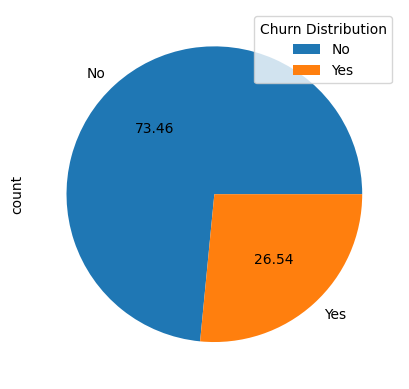

In [20]:
data['Churn'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(title = 'Churn Distribution')

In [21]:
def analyse_features (data, cat_column, target_column = 'Churn'):
    
    category_counts = data[cat_column].value_counts()
    fig = px.pie(names=category_counts.index, values=category_counts.values, title=f'{cat_column} Distribution', width = 400, height = 400)
    fig.show()
    
    # Churn Probability
    
    churn_probability = data.groupby(cat_column)[target_column].value_counts(normalize = True) * 100
    
    for cat_val in data[cat_column].unique(): 
        churn_rate = churn_probability[cat_val]['Yes'] if 'Yes' in churn_probability[cat_val].index else 0
        print(f"A {cat_val} customer has a probability of {churn_rate:.2f}% Churn")
        
    fig = px.histogram(data, x=cat_column, color=target_column, width=400, height=400)
    fig.show()
        
        
    grouped_data = data.groupby([cat_column, target_column]).size().reset_index(name = 'count')
        
        
    plt.figure(figsize=(10, 6))
        
    sns.barplot(data= grouped_data, x = cat_column, y= 'count', hue = target_column)
    plt.title(f"Number of people with / without churn by {cat_column} type")
    plt.xlabel(cat_column)
    plt.ylabel('Count')
    plt.show()

In [22]:
cat_cols[1:-1]

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

A Female customer has a probability of 26.92% Churn
A Male customer has a probability of 26.16% Churn


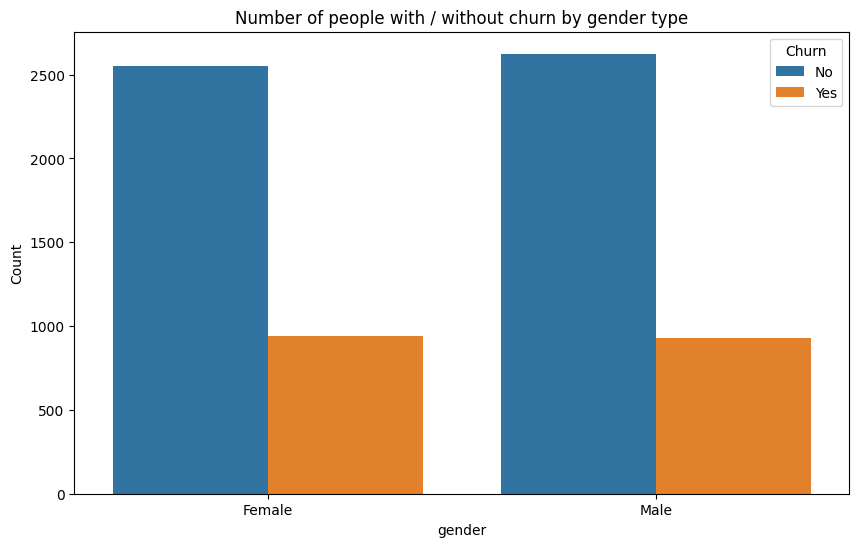

A Yes customer has a probability of 19.66% Churn
A No customer has a probability of 32.96% Churn


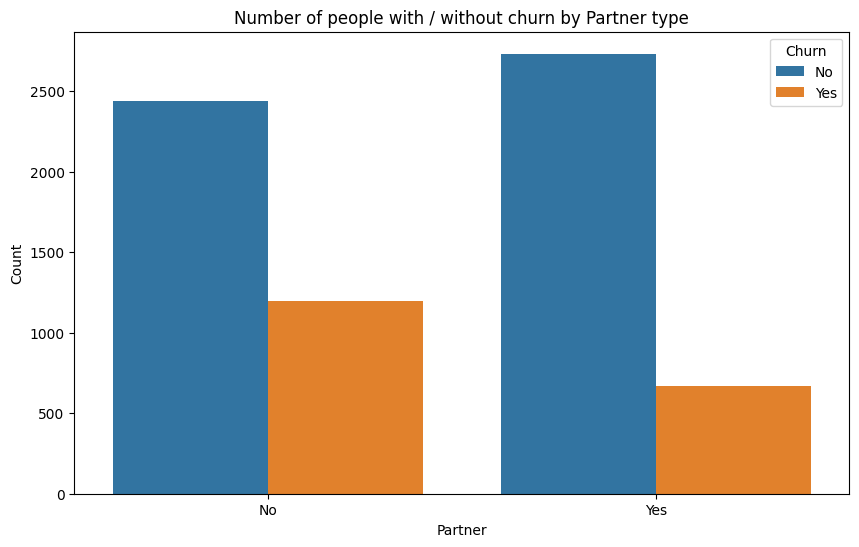

A No customer has a probability of 31.28% Churn
A Yes customer has a probability of 15.45% Churn


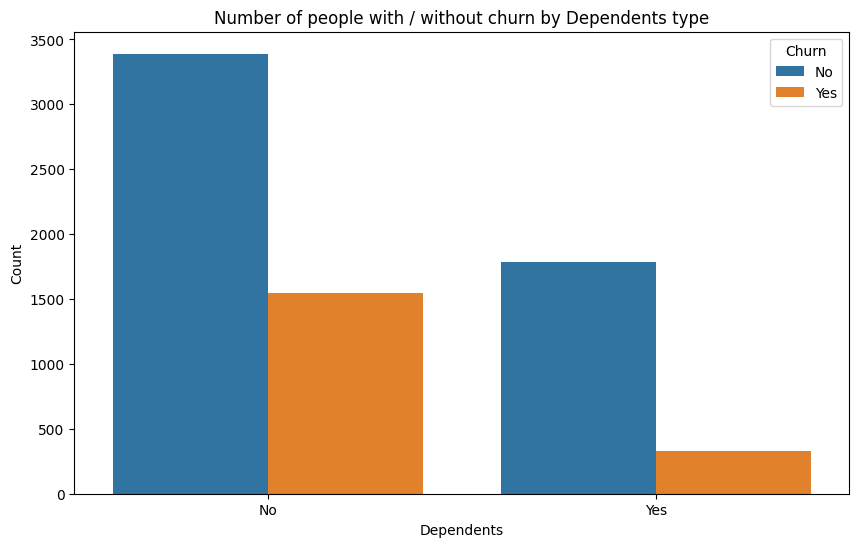

A No customer has a probability of 24.93% Churn
A Yes customer has a probability of 26.71% Churn


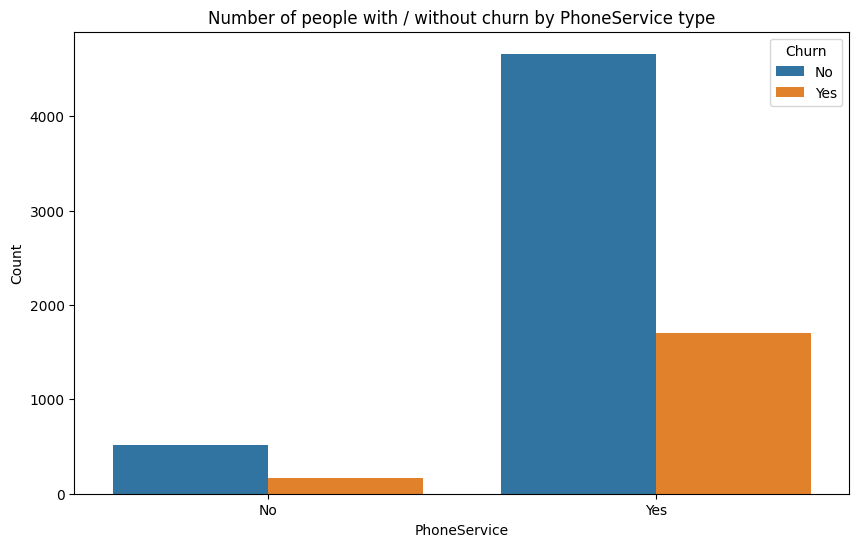

A No customer has a probability of 25.02% Churn
A Yes customer has a probability of 28.61% Churn


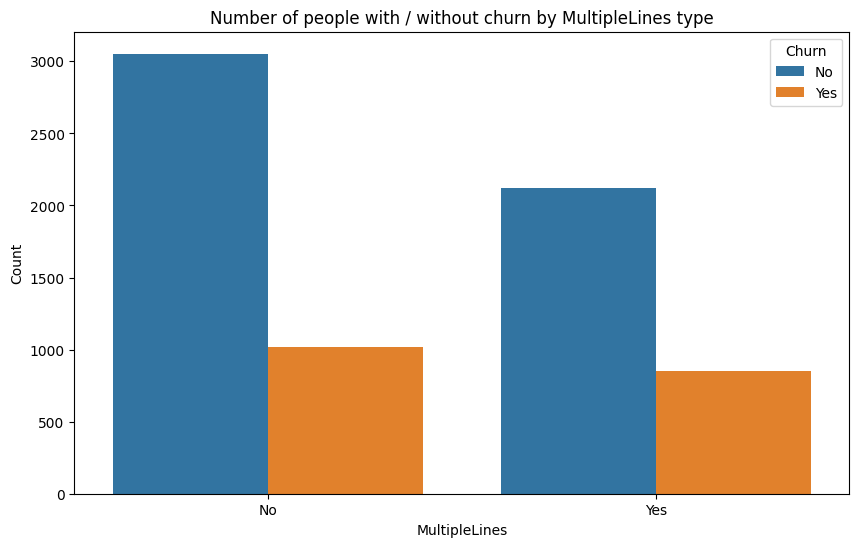

A DSL customer has a probability of 18.96% Churn
A Fiber optic customer has a probability of 41.89% Churn
A No customer has a probability of 7.40% Churn


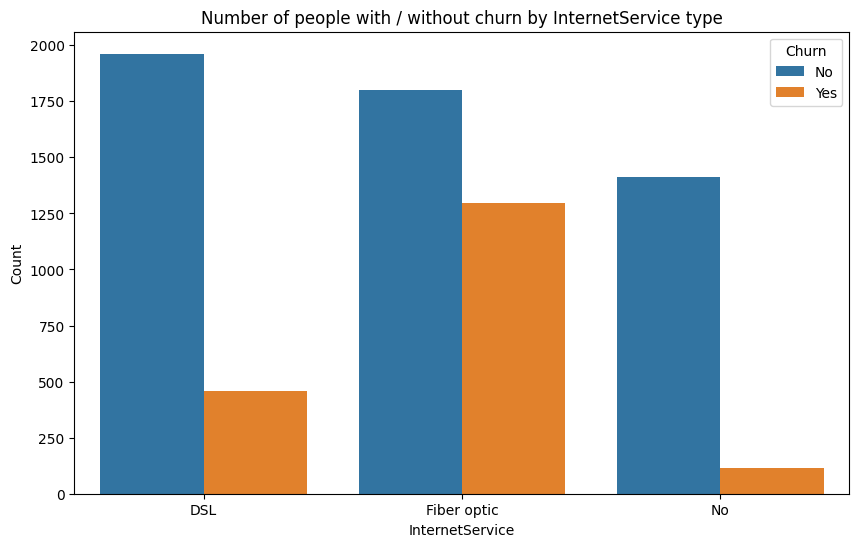

A No customer has a probability of 31.33% Churn
A Yes customer has a probability of 14.61% Churn


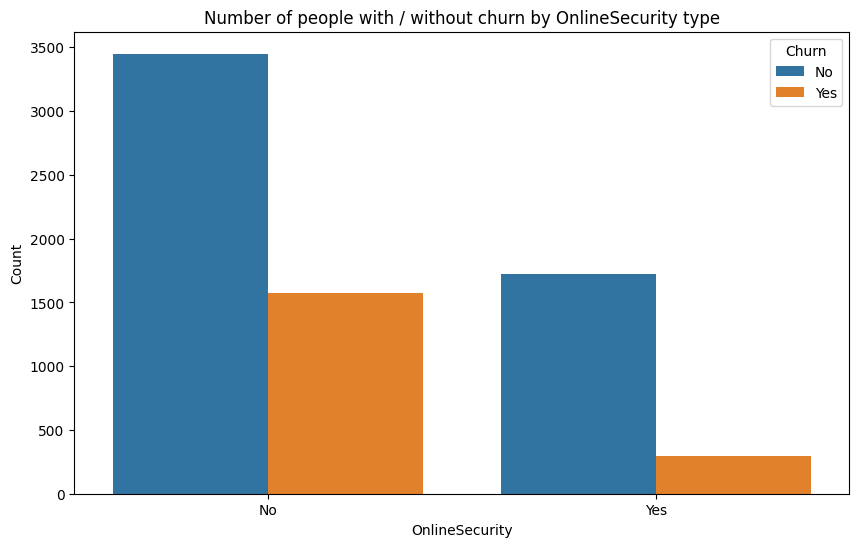

A Yes customer has a probability of 21.53% Churn
A No customer has a probability of 29.17% Churn


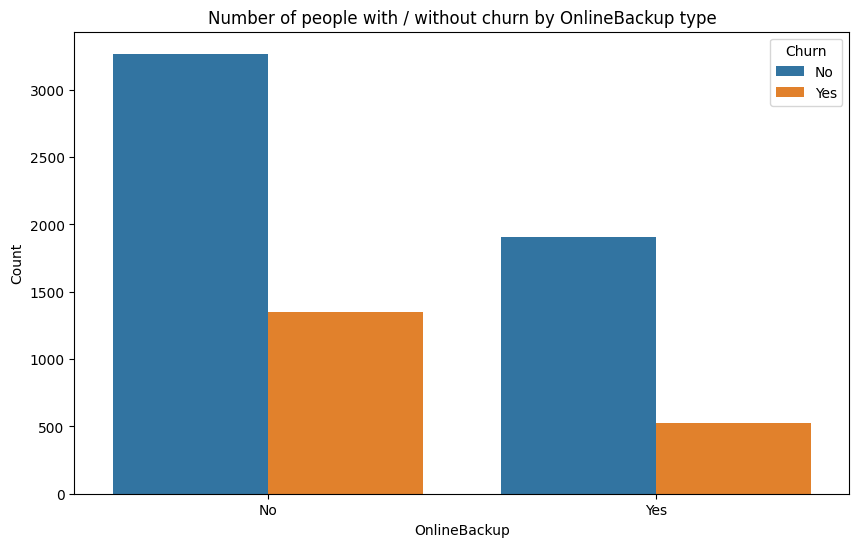

A No customer has a probability of 28.65% Churn
A Yes customer has a probability of 22.50% Churn


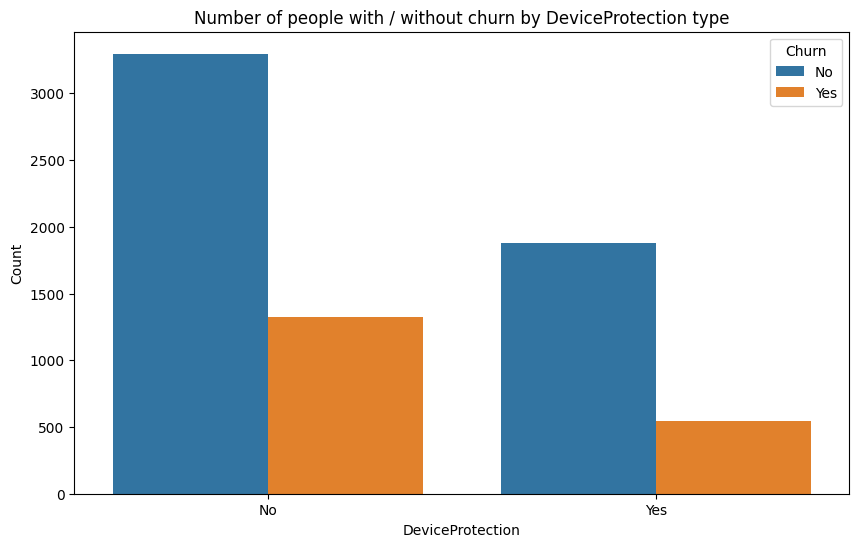

A No customer has a probability of 31.19% Churn
A Yes customer has a probability of 15.17% Churn


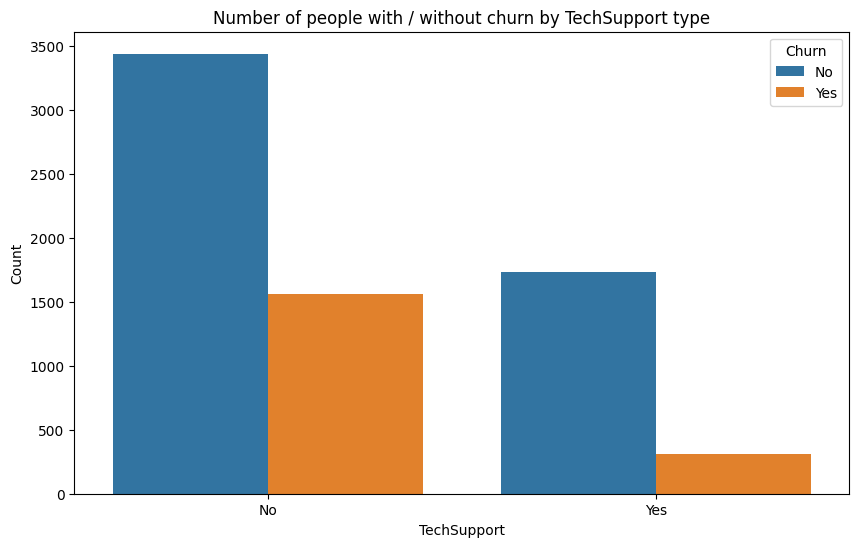

A No customer has a probability of 24.33% Churn
A Yes customer has a probability of 30.07% Churn


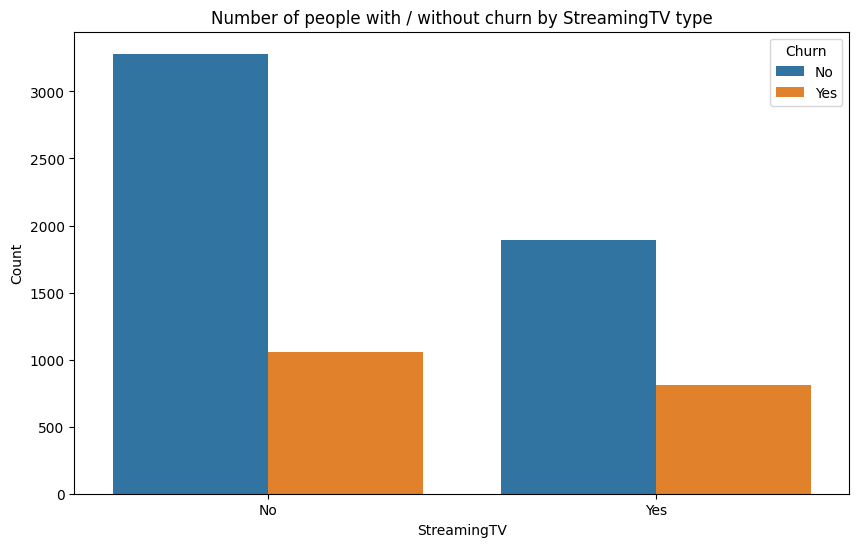

A No customer has a probability of 24.38% Churn
A Yes customer has a probability of 29.94% Churn


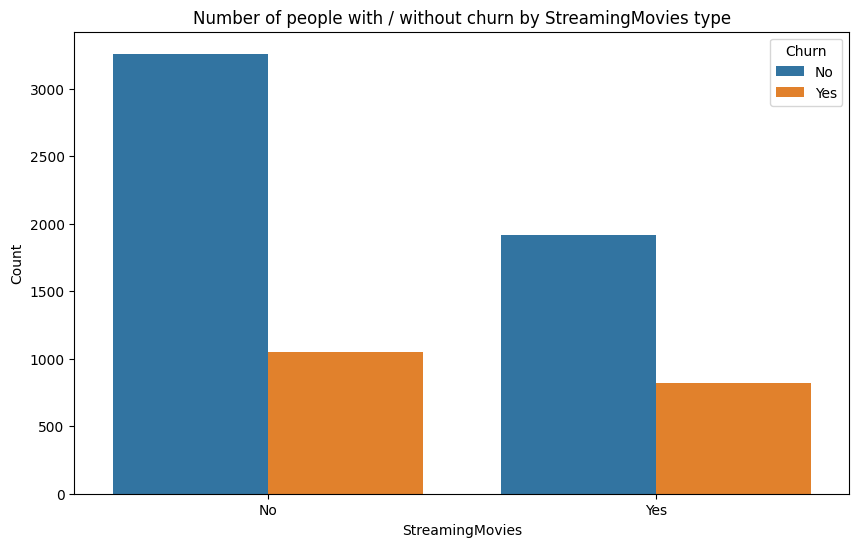

A Month-to-month customer has a probability of 42.71% Churn
A One year customer has a probability of 11.27% Churn
A Two year customer has a probability of 2.83% Churn


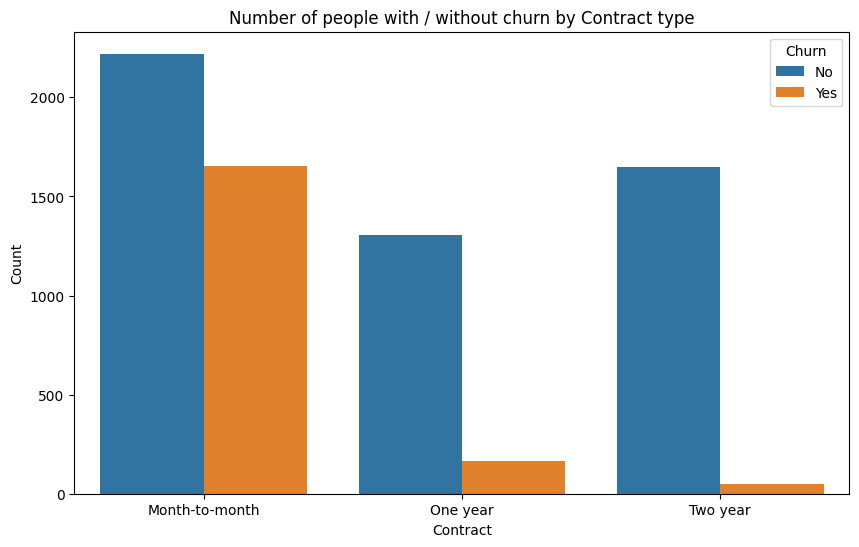

A Yes customer has a probability of 33.57% Churn
A No customer has a probability of 16.33% Churn


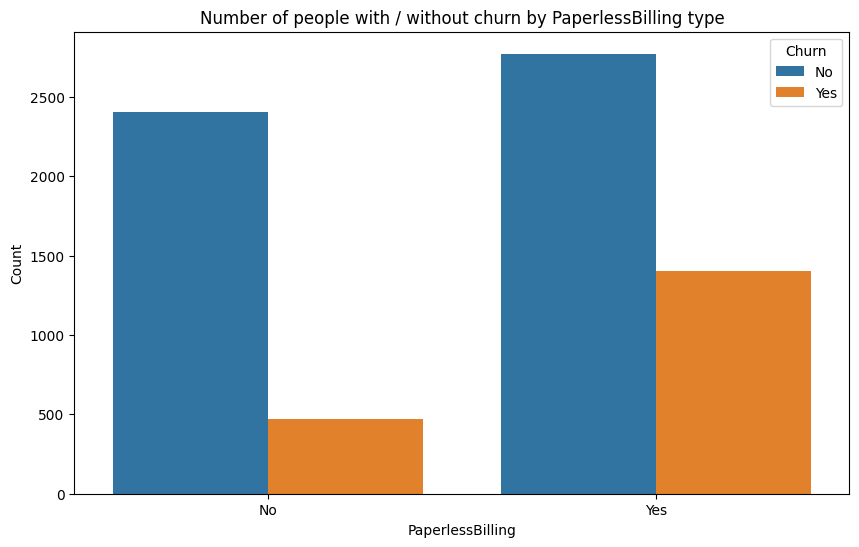

A Electronic check customer has a probability of 45.29% Churn
A Mailed check customer has a probability of 19.11% Churn
A Bank transfer (automatic) customer has a probability of 16.71% Churn
A Credit card (automatic) customer has a probability of 15.24% Churn


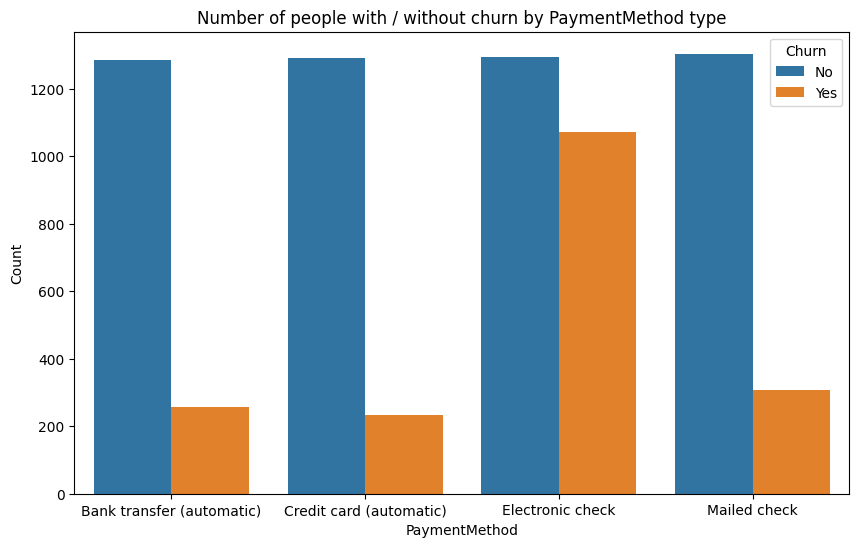

In [23]:
for col in cat_cols[1:-1]:
    
    analyse_features(data, f"{col}")

In [24]:
pd.options.plotting.backend = "plotly"

data[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind='histogram')

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier, Pool

In [26]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7038          Yes           Yes             DSL            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7040           No            No             DSL            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [27]:
X = data.drop(columns = ['Churn'])
y = data['Churn']

In [28]:
preprocessor = ColumnTransformer([
    ('Scaler', StandardScaler(), num_cols),
    ('Encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols[1:-1])
])

In [37]:
X_transformed = preprocessor.fit_transform(X)

In [38]:
X_transformed = pd.DataFrame(X_transformed, columns = preprocessor.get_feature_names_out())
X_transformed

Scaler__SeniorCitizen  Scaler__tenure  Scaler__MonthlyCharges  \
0                 -0.439916       -1.277445               -1.160323   
1                 -0.439916        0.066327               -0.259629   
2                 -0.439916       -1.236724               -0.362660   
3                 -0.439916        0.514251               -0.746535   
4                 -0.439916       -1.236724                0.197365   
...                     ...             ...                     ...   
7038              -0.439916       -0.340876                0.665992   
7039              -0.439916        1.613701                1.277533   
7040              -0.439916       -0.870241               -1.168632   
7041               2.273159       -1.155283                0.320338   
7042              -0.439916        1.369379                1.358961   

      Scaler__TotalCharges  Encoder__gender_Female  Encoder__gender_Male  \
0                -0.992611                     1.0                   0.0   
1                -0.172165                     0.0                   1.0   
2                -0.958066                     0.0                   1.0   
3                -0.193672                     0.0                   1.0   
4                -0.938874                     1.0                   0.0   
...                    ...                     ...                   ...   
7038             -0.127605                     0.0                   1.0   
7039              2.242606                     1.0                   0.0   
7040             -0.852932                     1.0                   0.0   
7041             -0.870513                     0.0                   1.0   
7042              2.013897                     0.0                   1.0   

      Encoder__Partner_No  Encoder__Partner_Yes  Encoder__Dependents_No  \
0                     0.0                   1.0                     1.0   
1                     1.0                   0.0                     1.0   
2                     1.0                   0.0                     1.0   
3                     1.0                   0.0                     1.0   
4                     1.0                   0.0                     1.0   
...                   ...                   ...                     ...   
7038                  0.0                   1.0                     0.0   
7039                  0.0                   1.0                     0.0   
7040                  0.0                   1.0                     0.0   
7041                  0.0                   1.0                     1.0   
7042                  1.0                   0.0                     1.0   

      Encoder__Dependents_Yes  ...  Encoder__StreamingMovies_Yes  \
0                         0.0  ...                           0.0   
1                         0.0  ...                           0.0   
2                         0.0  ...                           0.0   
3                         0.0  ...                           0.0   
4                         0.0  ...                           0.0   
...                       ...  ...                           ...   
7038                      1.0  ...                           1.0   
7039                      1.0  ...                           1.0   
7040                      1.0  ...                           0.0   
7041                      0.0  ...                           0.0   
7042                      0.0  ...                           1.0   

      Encoder__Contract_Month-to-month  Encoder__Contract_One year  \
0                                  1.0                         0.0   
1                                  0.0                         1.0   
2                                  1.0                         0.0   
3                                  0.0                         1.0   
4                                  1.0                         0.0   
...                                ...                         ...   
7038                            

In [39]:
X_transformed = pd.concat([data['customerID'], X_transformed], axis = 1)
X_transformed

customerID  Scaler__SeniorCitizen  Scaler__tenure  \
0     7590-VHVEG              -0.439916       -1.277445   
1     5575-GNVDE              -0.439916        0.066327   
2     3668-QPYBK              -0.439916       -1.236724   
3     7795-CFOCW              -0.439916        0.514251   
4     9237-HQITU              -0.439916       -1.236724   
...          ...                    ...             ...   
7038  6840-RESVB              -0.439916       -0.340876   
7039  2234-XADUH              -0.439916        1.613701   
7040  4801-JZAZL              -0.439916       -0.870241   
7041  8361-LTMKD               2.273159       -1.155283   
7042  3186-AJIEK              -0.439916        1.369379   

      Scaler__MonthlyCharges  Scaler__TotalCharges  Encoder__gender_Female  \
0                  -1.160323             -0.992611                     1.0   
1                  -0.259629             -0.172165                     0.0   
2                  -0.362660             -0.958066                     0.0   
3                  -0.746535             -0.193672                     0.0   
4                   0.197365             -0.938874                     1.0   
...                      ...                   ...                     ...   
7038                0.665992             -0.127605                     0.0   
7039                1.277533              2.242606                     1.0   
7040               -1.168632             -0.852932                     1.0   
7041                0.320338             -0.870513                     0.0   
7042                1.358961              2.013897                     0.0   

      Encoder__gender_Male  Encoder__Partner_No  Encoder__Partner_Yes  \
0                      0.0                  0.0                   1.0   
1                      1.0                  1.0                   0.0   
2                      1.0                  1.0                   0.0   
3                      1.0                  1.0                   0.0   
4                      0.0                  1.0                   0.0   
...                    ...                  ...                   ...   
7038                   1.0                  0.0                   1.0   
7039                   0.0                  0.0                   1.0   
7040                   0.0                  0.0                   1.0   
7041                   1.0                  0.0                   1.0   
7042                   1.0                  1.0                   0.0   

      Encoder__Dependents_No  ...  Encoder__StreamingMovies_Yes  \
0                        1.0  ...                           0.0   
1                        1.0  ...                           0.0   
2                        1.0  ...                           0.0   
3                        1.0  ...                           0.0   
4                        1.0  ...                           0.0   
...                      ...  ...                           ...   
7038                     0.0  ...                           1.0   
7039                     0.0  ...                           1.0   
7040                     0.0  ...                           0.0   
7041                     1.0  ...                           0.0   
7042                     1.0  ...                           1.0   

      Encoder__Contract_Month-to-month  Encoder__Contract_One year  \
0                                  1.0                         0.0   
1                                  0.0                         1.0   
2                                  1.0                         0.0   
3                                  0.0                         1.0   
4                                  1.0                         0.0   
...                                ...                         ...   
7038                               0.0                         1.0   
7039                               0.0                         1.0   
7040                               1.0          

In [40]:
le = LabelEncoder()

y_transformed = le.fit_transform(y)

In [41]:
X_transformed.shape

(7043, 39)

In [42]:
y_transformed

array([0, 0, 1, ..., 0, 1, 0])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, stratify=y_transformed, test_size=0.2, random_state=14)

In [44]:
X_train

customerID  Scaler__SeniorCitizen  Scaler__tenure  \
6636  3468-DRVQJ              -0.439916       -0.910961   
4186  7572-KPVKK              -0.439916        1.206498   
2680  6997-UVGOX              -0.439916        1.572981   
5025  7326-RIGQZ              -0.439916       -1.073843   
4026  0266-GMEAO              -0.439916        1.613701   
...          ...                    ...             ...   
2408  6619-RPLQZ              -0.439916        0.514251   
2628  2792-LSHWX              -0.439916       -1.277445   
6167  3154-CFSZG              -0.439916        0.595692   
4325  2700-LUEVA              -0.439916       -1.277445   
3278  4293-ETKAP              -0.439916        1.328659   

      Scaler__MonthlyCharges  Scaler__TotalCharges  Encoder__gender_Female  \
6636                0.184071             -0.707474                     1.0   
4186                1.305784              1.901836                     0.0   
2680                0.687595              1.654509                     0.0   
5025                0.167453             -0.839079                     0.0   
4026                1.646452              2.549515                     0.0   
...                      ...                   ...                     ...   
2408               -1.459446             -0.612178                     1.0   
2628                0.619462             -0.968985                     1.0   
6167                0.840481              0.819482                     0.0   
4325               -1.462770             -0.996625                     0.0   
3278                0.486518              1.231856                     1.0   

      Encoder__gender_Male  Encoder__Partner_No  Encoder__Partner_Yes  \
6636                   0.0                  0.0                   1.0   
4186                   1.0                  1.0                   0.0   
2680                   1.0                  0.0                   1.0   
5025                   1.0                  0.0                   1.0   
4026                   1.0                  0.0                   1.0   
...                    ...                  ...                   ...   
2408                   0.0                  0.0                   1.0   
2628                   0.0                  1.0                   0.0   
6167                   1.0                  0.0                   1.0   
4325                   1.0                  1.0                   0.0   
3278                   0.0                  0.0                   1.0   

      Encoder__Dependents_No  ...  Encoder__StreamingMovies_Yes  \
6636                     0.0  ...                           0.0   
4186                     0.0  ...                           1.0   
2680                     0.0  ...                           1.0   
5025                     0.0  ...                           0.0   
4026                     0.0  ...                           1.0   
...                      ...  ...                           ...   
2408                     0.0  ...                           0.0   
2628                     1.0  ...                           0.0   
6167                     0.0  ...                           1.0   
4325                     1.0  ...                           0.0   
3278                     0.0  ...                           1.0   

      Encoder__Contract_Month-to-month  Encoder__Contract_One year  \
6636                               0.0                         1.0   
4186                               0.0                         0.0   
2680                               0.0                         0.0   
5025                               1.0                         0.0   
4026                               0.0                         0.0   
...                                ...                         ...   
2408                               0.0                         0.0   
2628                               1.0                         0.0   
6167                               1.0          

In [45]:
cat_model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3)

In [57]:
X_train.drop(columns = ['customerID'])

Scaler__SeniorCitizen  Scaler__tenure  Scaler__MonthlyCharges  \
6636              -0.439916       -0.910961                0.184071   
4186              -0.439916        1.206498                1.305784   
2680              -0.439916        1.572981                0.687595   
5025              -0.439916       -1.073843                0.167453   
4026              -0.439916        1.613701                1.646452   
...                     ...             ...                     ...   
2408              -0.439916        0.514251               -1.459446   
2628              -0.439916       -1.277445                0.619462   
6167              -0.439916        0.595692                0.840481   
4325              -0.439916       -1.277445               -1.462770   
3278              -0.439916        1.328659                0.486518   

      Scaler__TotalCharges  Encoder__gender_Female  Encoder__gender_Male  \
6636             -0.707474                     1.0                   0.0   
4186              1.901836                     0.0                   1.0   
2680              1.654509                     0.0                   1.0   
5025             -0.839079                     0.0                   1.0   
4026              2.549515                     0.0                   1.0   
...                    ...                     ...                   ...   
2408             -0.612178                     1.0                   0.0   
2628             -0.968985                     1.0                   0.0   
6167              0.819482                     0.0                   1.0   
4325             -0.996625                     0.0                   1.0   
3278              1.231856                     1.0                   0.0   

      Encoder__Partner_No  Encoder__Partner_Yes  Encoder__Dependents_No  \
6636                  0.0                   1.0                     0.0   
4186                  1.0                   0.0                     0.0   
2680                  0.0                   1.0                     0.0   
5025                  0.0                   1.0                     0.0   
4026                  0.0                   1.0                     0.0   
...                   ...                   ...                     ...   
2408                  0.0                   1.0                     0.0   
2628                  1.0                   0.0                     1.0   
6167                  0.0                   1.0                     0.0   
4325                  1.0                   0.0                     1.0   
3278                  0.0                   1.0                     0.0   

      Encoder__Dependents_Yes  ...  Encoder__StreamingMovies_Yes  \
6636                      1.0  ...                           0.0   
4186                      1.0  ...                           1.0   
2680                      1.0  ...                           1.0   
5025                      1.0  ...                           0.0   
4026                      1.0  ...                           1.0   
...                       ...  ...                           ...   
2408                      1.0  ...                           0.0   
2628                      0.0  ...                           0.0   
6167                      1.0  ...                           1.0   
4325                      0.0  ...                           0.0   
3278                      1.0  ...                           1.0   

      Encoder__Contract_Month-to-month  Encoder__Contract_One year  \
6636                               0.0                         1.0   
4186                               0.0                         0.0   
2680                               0.0                         0.0   
5025                               1.0                         0.0   
4026                               0.0                         0.0   
...                                ...                         ...   
2408                            

In [58]:
cat_model.fit(X_train.drop(columns = ['customerID']), y_train, eval_set= (X_test.drop(columns = ['customerID']), y_test))

In [59]:
y_pred = cat_model.predict(X_test.drop(columns = ['customerID']))

In [60]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [61]:
accuracy, recall, roc_auc, precision = [round(metric(y_test, y_pred), 4) for metric in [accuracy_score, recall_score, roc_auc_score, precision_score]]

In [62]:
model_names = ['CatBoost_Model']

result = pd.DataFrame({'Accuracy':accuracy,
                       'Recall':recall, 
                       'Roc_Auc':roc_auc, 
                       'Precision':precision}, index=model_names)

In [63]:
result

Accuracy  Recall  Roc_Auc  Precision
CatBoost_Model    0.7466  0.8209   0.7703     0.5142

In [64]:
cat_model.save_model("Cat_Model.cbm")

In [69]:
X_transformed.columns[1:]

Index(['Scaler__SeniorCitizen', 'Scaler__tenure', 'Scaler__MonthlyCharges',
       'Scaler__TotalCharges', 'Encoder__gender_Female',
       'Encoder__gender_Male', 'Encoder__Partner_No', 'Encoder__Partner_Yes',
       'Encoder__Dependents_No', 'Encoder__Dependents_Yes',
       'Encoder__PhoneService_No', 'Encoder__PhoneService_Yes',
       'Encoder__MultipleLines_No', 'Encoder__MultipleLines_Yes',
       'Encoder__InternetService_DSL', 'Encoder__InternetService_Fiber optic',
       'Encoder__InternetService_No', 'Encoder__OnlineSecurity_No',
       'Encoder__OnlineSecurity_Yes', 'Encoder__OnlineBackup_No',
       'Encoder__OnlineBackup_Yes', 'Encoder__DeviceProtection_No',
       'Encoder__DeviceProtection_Yes', 'Encoder__TechSupport_No',
       'Encoder__TechSupport_Yes', 'Encoder__StreamingTV_No',
       'Encoder__StreamingTV_Yes', 'Encoder__StreamingMovies_No',
       'Encoder__StreamingMovies_Yes', 'Encoder__Contract_Month-to-month',
       'Encoder__Contract_One year', 'Encoder__C

In [70]:
pool = Pool(X_train.drop(columns = ['customerID']), y_train)

feature_importance = pd.DataFrame({'feature_importance': cat_model.get_feature_importance(pool), 
                      'feature_names': X_transformed.columns[1:]}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

feature_importance

feature_importance                                     feature_names
1            17.406805                                    Scaler__tenure
29           13.198333                  Encoder__Contract_Month-to-month
2             8.379834                            Scaler__MonthlyCharges
15            7.829363              Encoder__InternetService_Fiber optic
3             6.273425                              Scaler__TotalCharges
31            5.697463                        Encoder__Contract_Two year
36            5.069752           Encoder__PaymentMethod_Electronic check
16            2.688936                       Encoder__InternetService_No
14            2.653020                      Encoder__InternetService_DSL
32            2.221040                      Encoder__PaperlessBilling_No
17            2.161799                        Encoder__OnlineSecurity_No
27            1.702260                       Encoder__StreamingMovies_No
0             1.628301                             Scaler__SeniorCitizen
18            1.612666                       Encoder__OnlineSecurity_Yes
30            1.609464                        Encoder__Contract_One year
24            1.582039                          Encoder__TechSupport_Yes
28            1.506592                      Encoder__StreamingMovies_Yes
35            1.476919    Encoder__PaymentMethod_Credit card (automatic)
23            1.417367                           Encoder__TechSupport_No
5             1.331227                              Encoder__gender_Male
13            1.321213                        Encoder__MultipleLines_Yes
26            1.302647                          Encoder__StreamingTV_Yes
20            1.239899                         Encoder__OnlineBackup_Yes
33            1.229741                     Encoder__PaperlessBilling_Yes
12            0.880537                         Encoder__MultipleLines_No
10            0.765781                          Encoder__PhoneService_No
25            0.678279                           Encoder__StreamingTV_No
11            0.658639                         Encoder__PhoneService_Yes
19            0.656784                          Encoder__OnlineBackup_No
9             0.569561                           Encoder__Dependents_Yes
8             0.536626                            Encoder__Dependents_No
34            0.526997  Encoder__PaymentMethod_Bank transfer (automatic)
37            0.524179               Encoder__PaymentMethod_Mailed check
4             0.516058                            Encoder__gender_Female
22            0.417156                     Encoder__DeviceProtection_Yes
6             0.356473                               Encoder__Partner_No
7             0.247556                              Encoder__Partner_Yes
21            0.125268                      Encoder__DeviceProtection_No

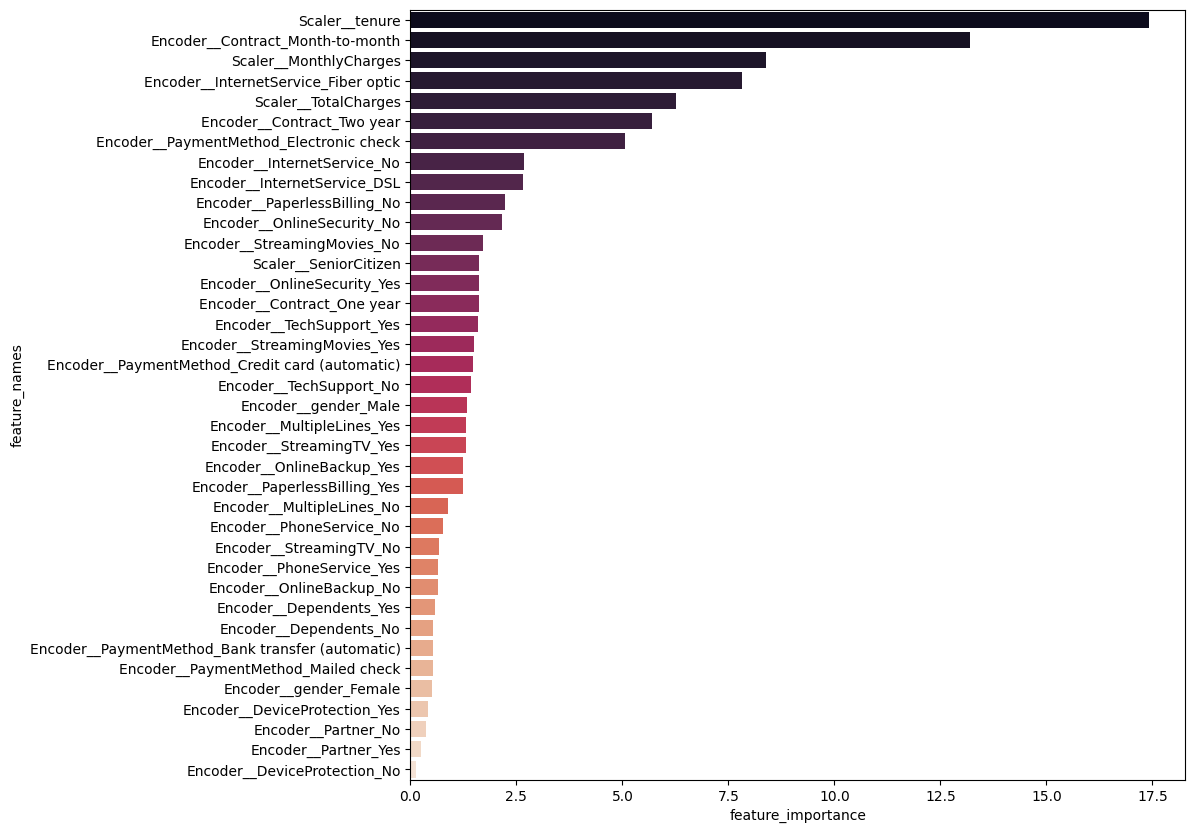

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'], palette = 'rocket')
plt.show()

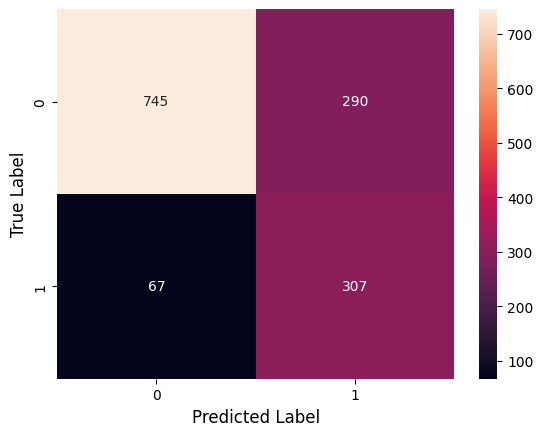

In [72]:
cat_confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [73]:
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [74]:
from xgboost import XGBClassifier, plot_importance

import shap
import lime
import lime.lime_tabular

In [76]:
explainer = shap.TreeExplainer(cat_model)
shap_values_cat_train = explainer.shap_values(X_train.drop(columns = ['customerID']))
shap_values_cat_test = explainer.shap_values(X_test.drop(columns = ['customerID']))

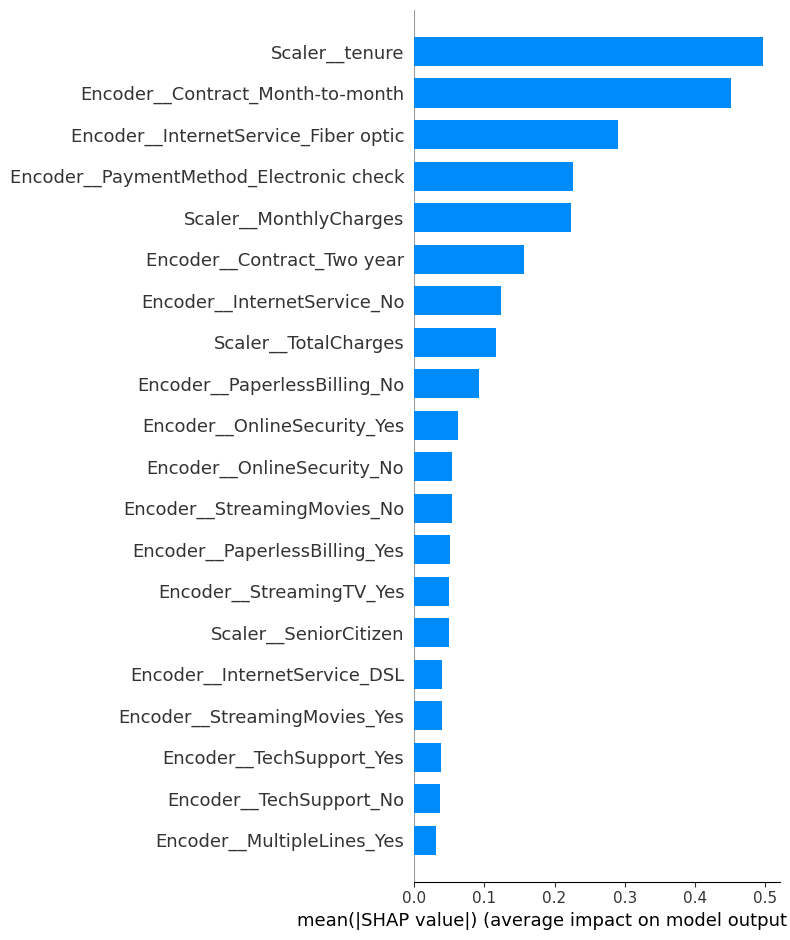

In [78]:
shap.summary_plot(shap_values_cat_train, X_train.drop(columns = ['customerID']), plot_type = 'bar')

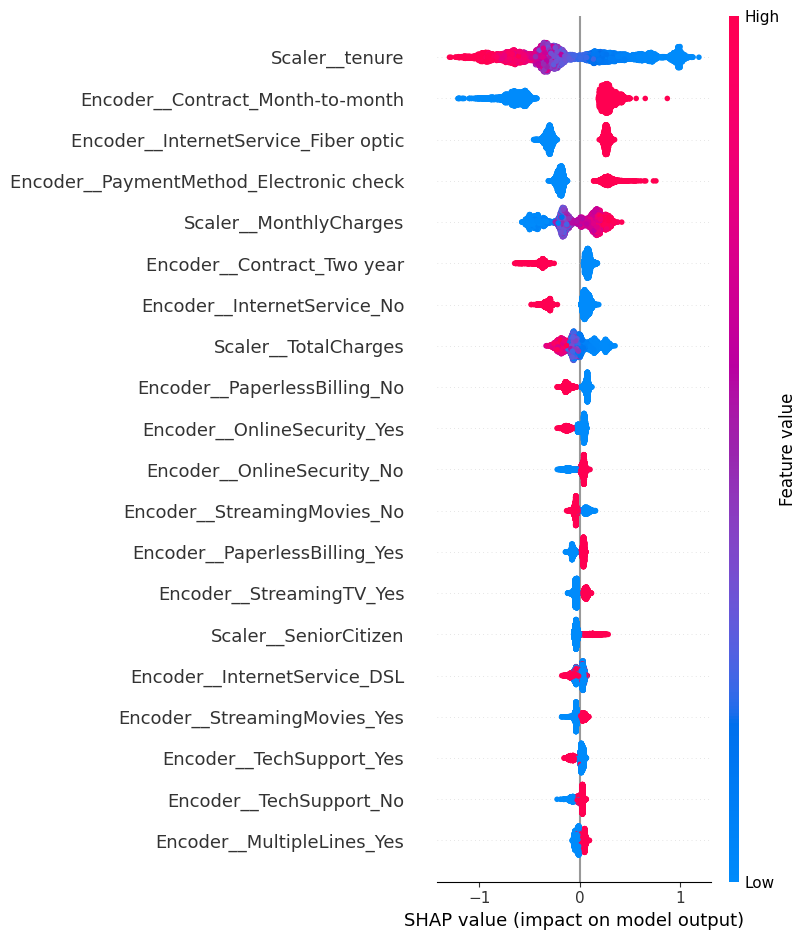

In [80]:
ax = shap.summary_plot(shap_values_cat_train, X_train.drop(columns = ['customerID']), plot_type="dot")

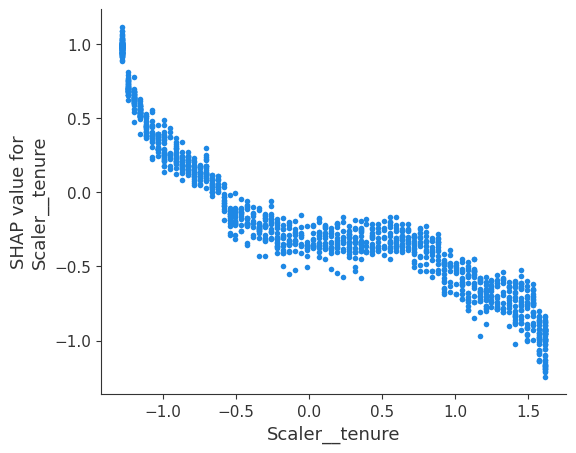

In [81]:
shp_plt = shap.dependence_plot("Scaler__tenure", shap_values_cat_test, X_test.drop(columns = ['customerID']), ax=ax,interaction_index=None)

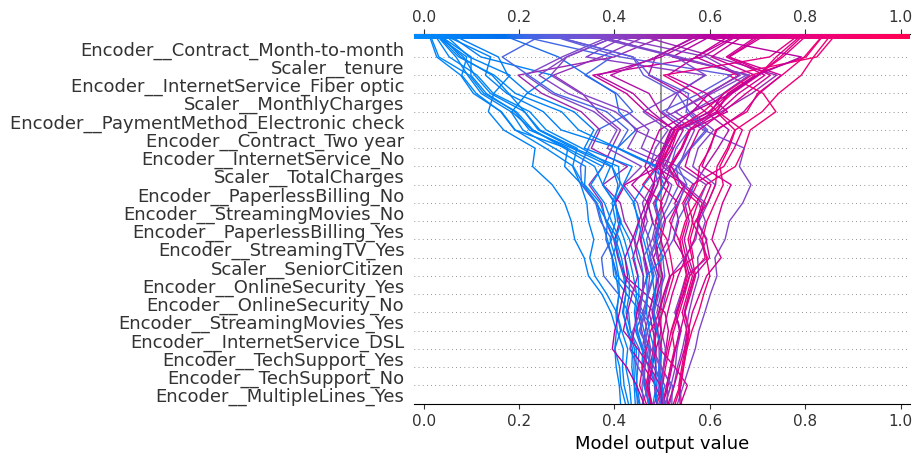

In [82]:
ax_1= shap.decision_plot(explainer.expected_value, shap_values_cat_test[:50], X_test.drop(columns = ['customerID'])[:50],auto_size_plot=False, link= "logit")

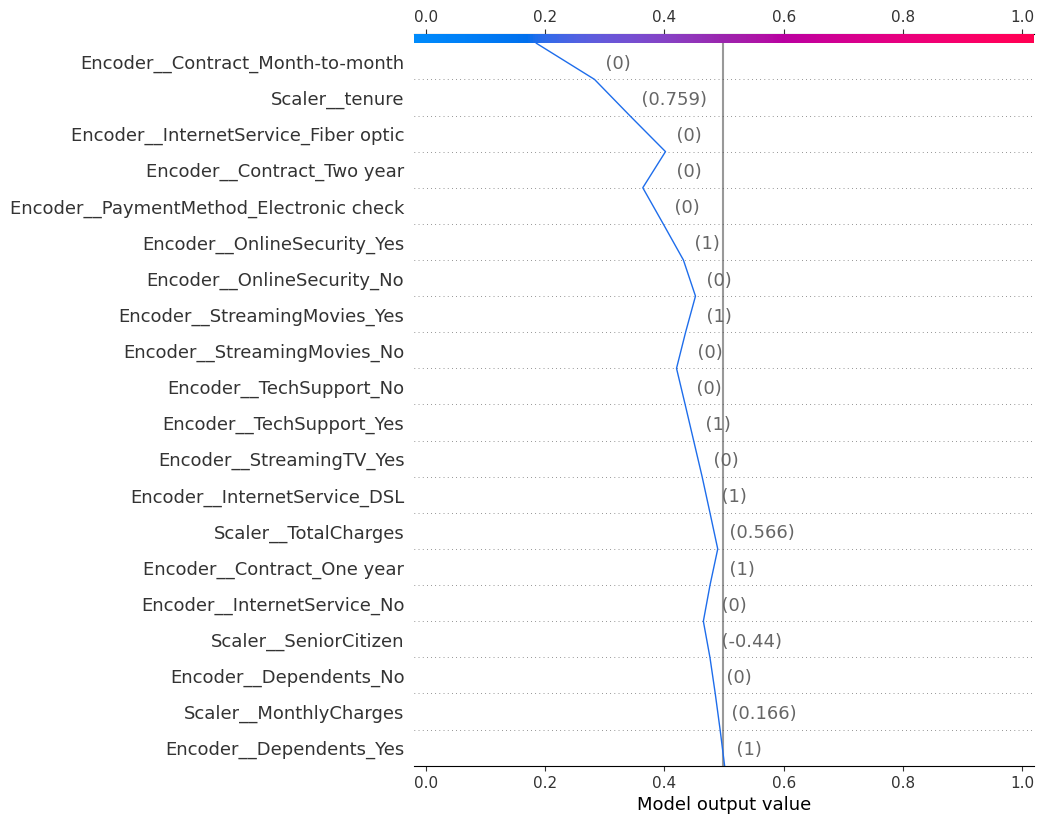

In [83]:
shap.decision_plot(explainer.expected_value, shap_values_cat_test[13], X_test.drop(columns = ['customerID']).iloc[[13]], link= "logit")

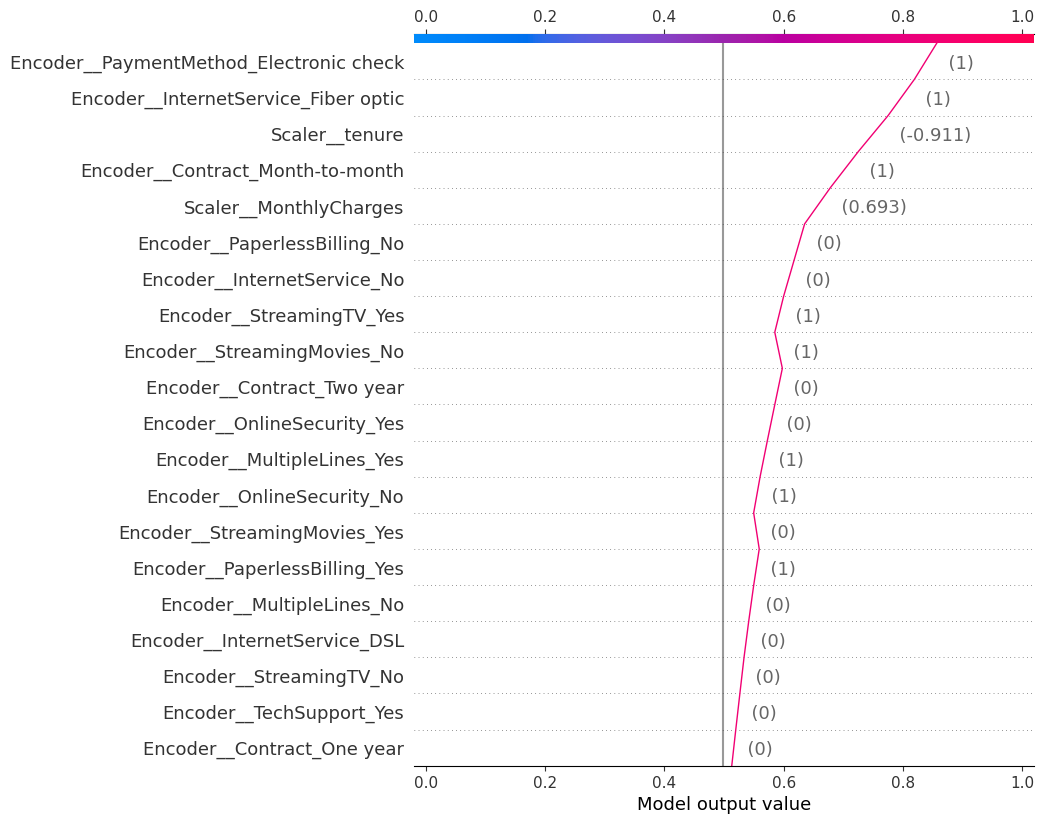

In [84]:
shap.decision_plot(explainer.expected_value, shap_values_cat_test[64], X_test.drop(columns = ['customerID']).iloc[[64]], link= "logit")

In [85]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_cat_test[:75], X_test.drop(columns = ['customerID']).iloc[:75],link= "logit")

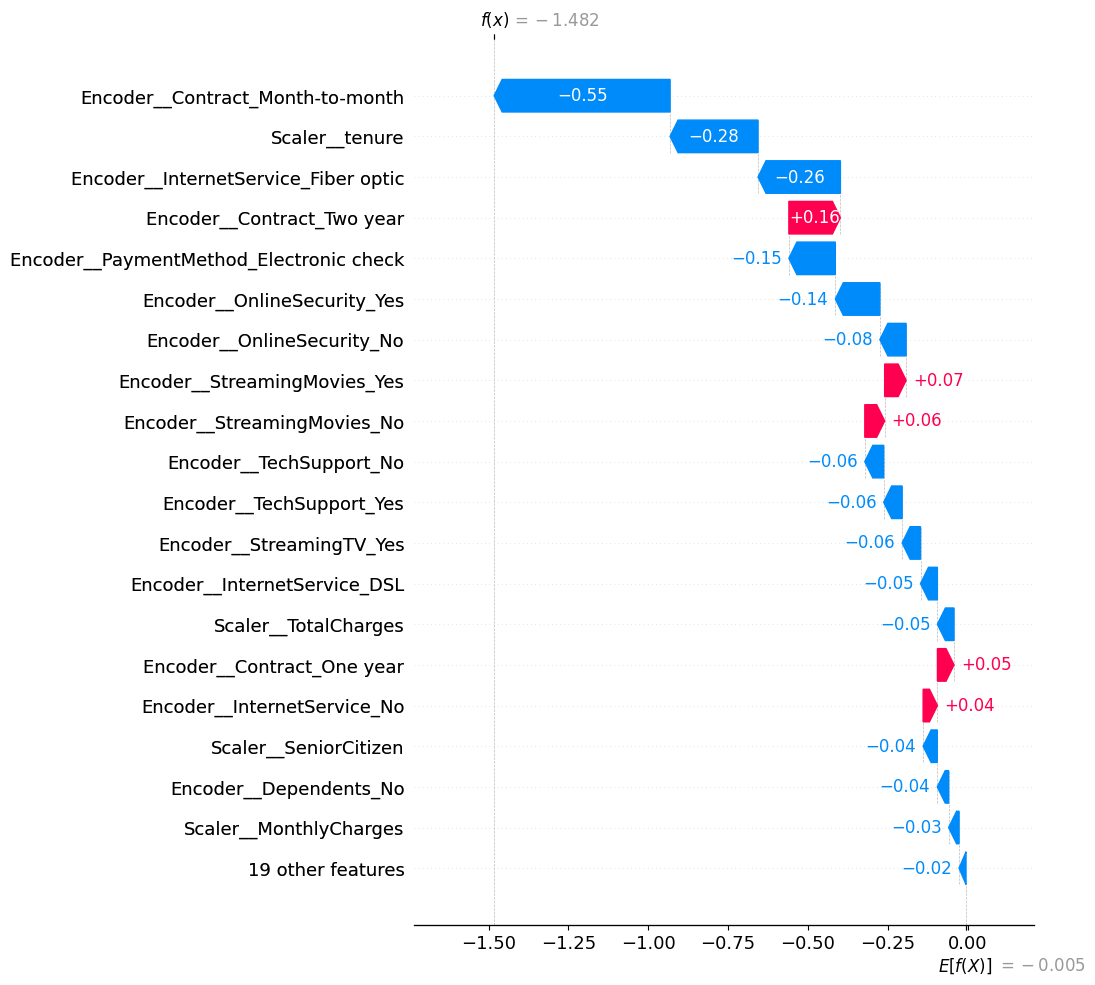

In [86]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values_cat_test[13], feature_names = X_test.columns[1:],max_display = 20)

In [87]:
from xgboost import XGBClassifier, plot_importance

In [88]:
xgb = XGBClassifier()

In [89]:
xgb.fit(X_train.drop(columns = ['customerID']), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
y_pred = xgb.predict(X_test.drop(columns = ['customerID']))

In [91]:
accuracy, recall, roc_auc, precision = [round(metric(y_test, y_pred), 4) for metric in [accuracy_score, recall_score, roc_auc_score, precision_score]]

model_names = ['XGBoost_adjusted_weight_3']
result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df

Accuracy  Recall  Roc_Auc  Precision
XGBoost_adjusted_weight_3    0.7857  0.5428   0.7081     0.6078

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

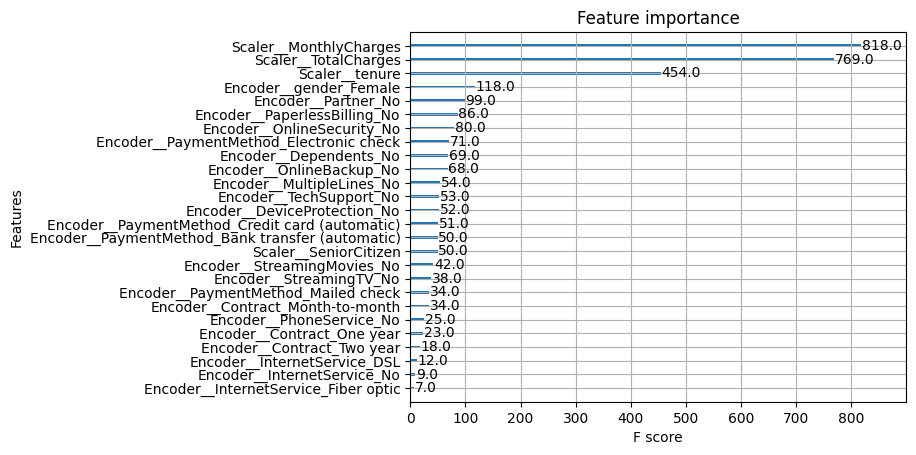

In [92]:
plot_importance(xgb)

In [94]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.drop(columns = ['customerID']).values, feature_names=X_train.columns[1:].values.tolist(),class_names=['Churn'], verbose=True, mode='classification')

j = 13
exp = explainer.explain_instance(X_train.drop(columns = ['customerID']).values[j], xgb.predict_proba, num_features=5)

Intercept 0.034048399311035565
Prediction_local [0.29248754]
Right: 0.05989526


In [95]:
exp.show_in_notebook(show_table=True)

In [96]:
xgb.save_model("XGB.cgb")

In [97]:
X_transformed.to_parquet('churn_data_regulated.parquet')

In [98]:
y_train = pd.DataFrame(y_train, columns = ['Churn'])
y_test = pd.DataFrame(y_test, columns = ['Churn'])

In [99]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')